## Plots for matura arbeit

### Setup

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

plt.style.use("seaborn-v0_8-whitegrid")

In [43]:
files = glob.glob("data/**/*.csv", recursive=True)
files

['data\\base\\run_1.csv',
 'data\\ga_only\\run_3.csv',
 'data\\gen_q_learning\\run_4.csv',
 'data\\q_only\\run_2.csv']

### Dataframe loading

In [44]:
data = []
for f in files:
    df = pd.read_csv(f)
    df["run_id"] = os.path.splitext(os.path.basename(f))[0].split("_")[1]
    df["config"] = os.path.basename(os.path.dirname(f))
    data.append(df)
df_all = pd.concat(data)
df_all

,config,log_type,mean_fitness_alive,n_alive,run_id,seed,time,wave,damage,enemy_id,fitness,lifespan
0,base,wave_snapshot,0.157083,2.0,1,117964,1.000000,1,NaN,NaN,NaN,NaN
1,base,wave_snapshot,0.354792,4.0,1,117964,2.000000,1,NaN,NaN,NaN,NaN
2,base,wave_snapshot,0.654128,5.0,1,117964,3.000000,1,NaN,NaN,NaN,NaN
3,base,wave_snapshot,1.054244,5.0,1,117964,4.000000,1,NaN,NaN,NaN,NaN
4,base,wave_snapshot,1.454333,5.0,1,117964,5.000000,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
243,q_only,wave_snapshot,3.190759,2.0,2,456725,9.000000,15,NaN,NaN,NaN,NaN
244,q_only,death,NaN,NaN,2,456725,9.337544,15,1.0,74.0,7.921545,14.607726
245,q_only,wave_snapshot,8.994131,1.0,2,456725,10.000000,15,NaN,NaN,NaN,NaN
246,q_only,wave_snapshot,14.394362,1.0,2,456725,11.000000,15,NaN,NaN,NaN,NaN


### Intra Wave Plots

#### Q-learning only: time vs fitness.

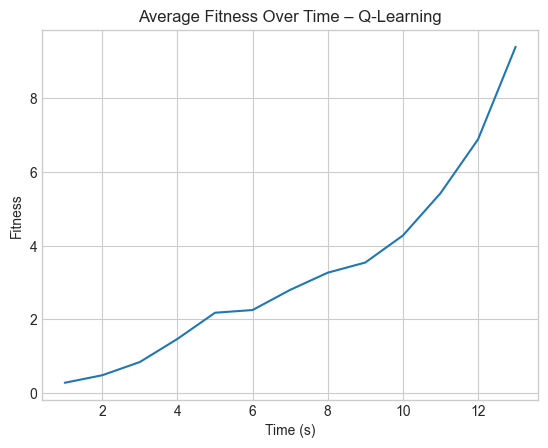

In [45]:
subset = df_all[(df_all["config"] == "q_only") & (df_all["log_type"] == "wave_snapshot")]
grouped = subset.groupby("time")["mean_fitness_alive"].mean()
plt.plot(grouped.index, grouped.values)
plt.title("Average Fitness Over Time – Q-Learning")
plt.xlabel("Time (s)")
plt.ylabel("Fitness")
plt.show()

#### Baseline: time vs fitness

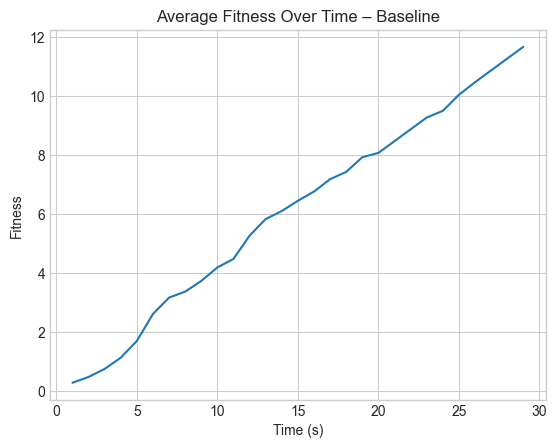

In [46]:
subset = df_all[(df_all["config"] == "base") & (df_all["log_type"] == "wave_snapshot")]
grouped = subset.groupby("time")["mean_fitness_alive"].mean()
plt.plot(grouped.index, grouped.values)
plt.title("Average Fitness Over Time – Baseline")
plt.xlabel("Time (s)")
plt.ylabel("Fitness")
plt.show()

### Across Wave plots

All configs: wave vs fitness

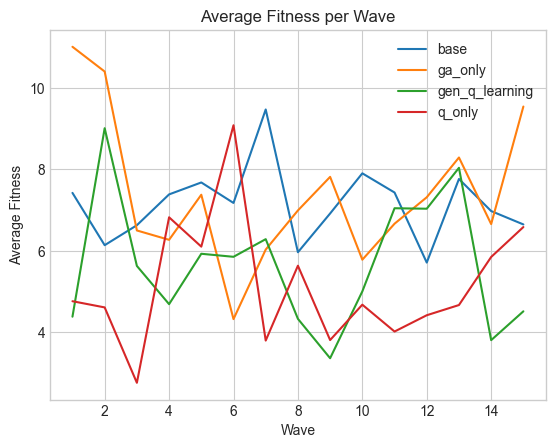

In [47]:
wave_avg = df_all.groupby(["config", "wave"])["fitness"].mean().reset_index()
for cfg in wave_avg["config"].unique():
    plt.plot(
        wave_avg[wave_avg["config"] == cfg]["wave"],
        wave_avg[wave_avg["config"] == cfg]["fitness"],
        label=cfg
    )
plt.title("Average Fitness per Wave")
plt.xlabel("Wave")
plt.ylabel("Average Fitness")
plt.legend()
plt.show()

### Curiosities

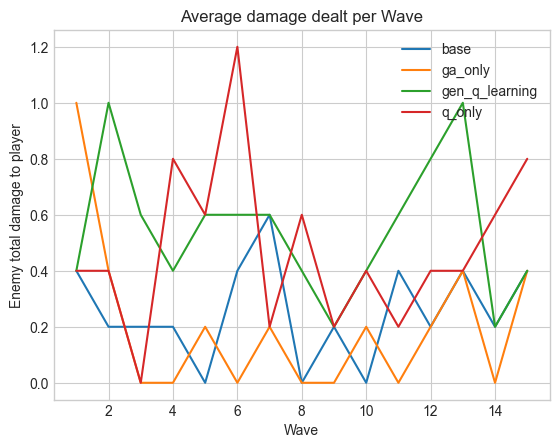

In [48]:
wave_avg = df_all.groupby(["config", "wave"])["damage"].mean().reset_index()
for cfg in wave_avg["config"].unique():
    plt.plot(
        wave_avg[wave_avg["config"] == cfg]["wave"],
        wave_avg[wave_avg["config"] == cfg]["damage"],
        label=cfg
    )
plt.title("Average damage dealt per Wave")
plt.xlabel("Wave")
plt.ylabel("Enemy total damage to player")
plt.legend()
plt.show()